In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import csv 

In [4]:
cd ../web-app/

/Users/dorislee/Desktop/Fall2016/Research/seg/crowd-seg/web-app


In [5]:
import sqlite3

from glob import glob; from os.path import expanduser
conn = sqlite3.connect(glob(expanduser('app.db'))[0])

In [9]:
table_names = ["bounding_box","image","object","object_location","worker"]

In [12]:
for table_name in table_names : 
    cursor = conn.cursor()
    cursor.execute("select * from {};".format(table_name))
    with open("{}.csv".format(table_name), "wb") as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow([i[0] for i in cursor.description]) # write headers
        csv_writer.writerows(cursor)

In [13]:
ls *.csv

bounding_box.csv     image.csv            object.csv           object_location.csv  worker.csv


In [14]:
cat image.csv

In [15]:
import pandas as pd 

In [22]:
import matplotlib.image as mpimg

In [16]:
img_info = pd.read_csv("image.csv")

In [57]:
fname = "app/static/"+img_info["filename"][0]+".png"
img=mpimg.imread(fname)

In [29]:
object_info = pd.read_csv("object.csv")
object_location = pd.read_csv("object_location.csv")
bb_info = pd.read_csv("bounding_box.csv")

In [49]:
object_tbl = object_info.merge(object_location,how="inner",left_on="id",right_on="object_id")

In [55]:
image_info = pd.read_csv("image.csv")

In [56]:
image_info

,id,filename
0,1,118522
1,2,favicon.ico


In [59]:
#Open image for computing width and height of image 
from PIL import Image
im = Image.open(fname)

In [64]:
object_tbl

,id,image_id,name,object_id,worker_id,x_loc,y_loc
0,1,1,lamp,1,1,0.773438,0.313783
1,2,1,chair,2,1,0.982422,0.938416
2,3,1,cutting board,3,1,0.621094,0.923754
3,4,1,fan,4,1,0.277344,0.387097
4,5,1,oven,5,1,0.341797,0.774194
5,6,1,countertop,6,1,0.117188,0.868035
6,7,1,table,7,1,0.789062,0.750733


In [65]:
bb_info

,object_id,worker_id,x_locs,y_locs
0,5,123,"[380, 234, 440]","[99, 215, 231]"
1,4,123,"[105, 180, 118]","[134, 136, 83]"
2,7,123,"[413, 359, 345, 448]","[98, 196, 242, 265]"
3,6,123,"[399, 365, 420]","[64, 155, 159]"
4,6,945,"[292, 411, 333]","[78, 118, 192]"
5,7,124,"[366, 332, 450, 452]","[212, 258, 268, 212]"
6,2,425,"[487, 480, 443, 460, 458, 508, 510]","[219, 266, 274, 294, 338, 336, 226]"


In [75]:
import ast

(341, 0)

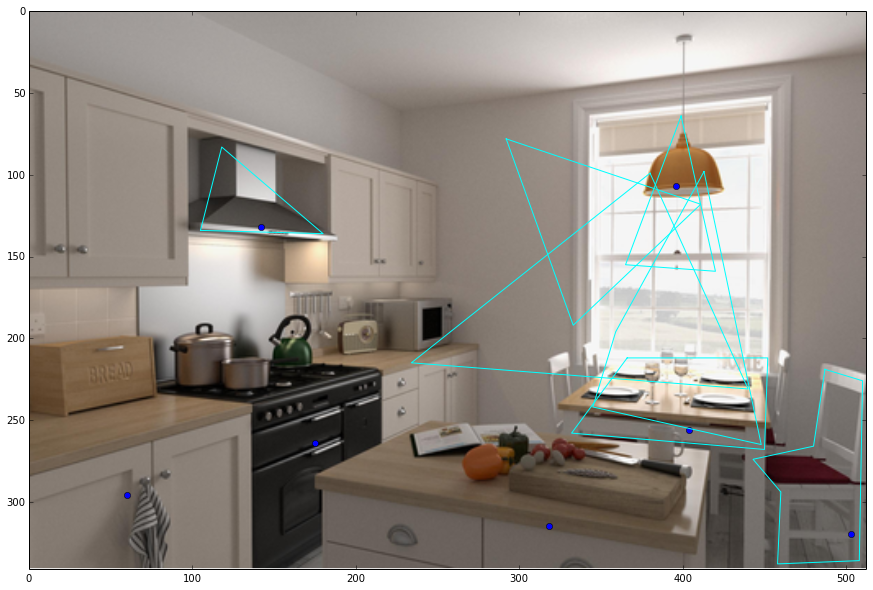

In [94]:
plt.figure(figsize =(15,15))
plt.imshow(img)
width = im.size[0]
height = im.size[1]
plt.plot(width*object_tbl["x_loc"],height*object_tbl["y_loc"],'o')
for bb_path in zip(bb_info["x_locs"],bb_info["y_locs"]):
    x_locs = ast.literal_eval(bb_path[0])
    y_locs = ast.literal_eval(bb_path[1])
    # Append the starting point again in the end to close the BB
    x_locs.append(x_locs[0])
    y_locs.append(y_locs[0])
    plt.plot(x_locs,y_locs,'-',color="cyan")
plt.xlim(0,width)
plt.ylim(height,0)

In [104]:
#Convert .jpg to .png

In [96]:
cd app/static

/Users/dorislee/Desktop/Fall2016/Research/seg/crowd-seg/web-app/app/static


In [106]:
import glob
import os 

In [108]:
for fname in glob.glob("COCO*"):
    os.system("convert {0} {1}".format(fname, fname.split(".")[0]+".png"))